In [1]:
import os
import sys
sys.path.insert(0, "..")

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import random

sys_rand = random.SystemRandom()

In [7]:
os.chdir("..")

In [45]:
import torch
from source.datasets.utils import VOC_CLASSES


IMAGENET_MEANS = [0.485, 0.456, 0.406]
IMAGENET_STD = [0.229, 0.224, 0.225]

print(len(VOC_CLASSES))


def show_image(image: np.ndarray) -> None:
    plt.imshow(image)
    plt.axis("off")
    plt.show()


def show_image_with_masks(image, mask) -> None:
    if isinstance(image, torch.Tensor):
        image = image.numpy().transpose(1, 2, 0)
        image = ((image * IMAGENET_STD + IMAGENET_MEANS) * 255).astype(np.uint8)
    if isinstance(mask, torch.Tensor):
        mask = mask.numpy().transpose(1, 2, 0)
        mask = (255 * mask).astype(np.uint8)
    _, axs = plt.subplots(nrows=2, ncols=11, figsize=(16, 4))
    axs[0, 0].imshow(image)
    axs[0, 0].axis("off")
    axs[0, 0].set_title("Source image")
    for i in range(1, len(VOC_CLASSES) + 1):
        row = i // 11
        col = i % 11
        axs[row, col].imshow(mask[:, :, i-1], cmap="gray")
        axs[row, col].axis("off")
        axs[row, col].set_title(VOC_CLASSES[i-1])
    plt.tight_layout()
    plt.show()

21


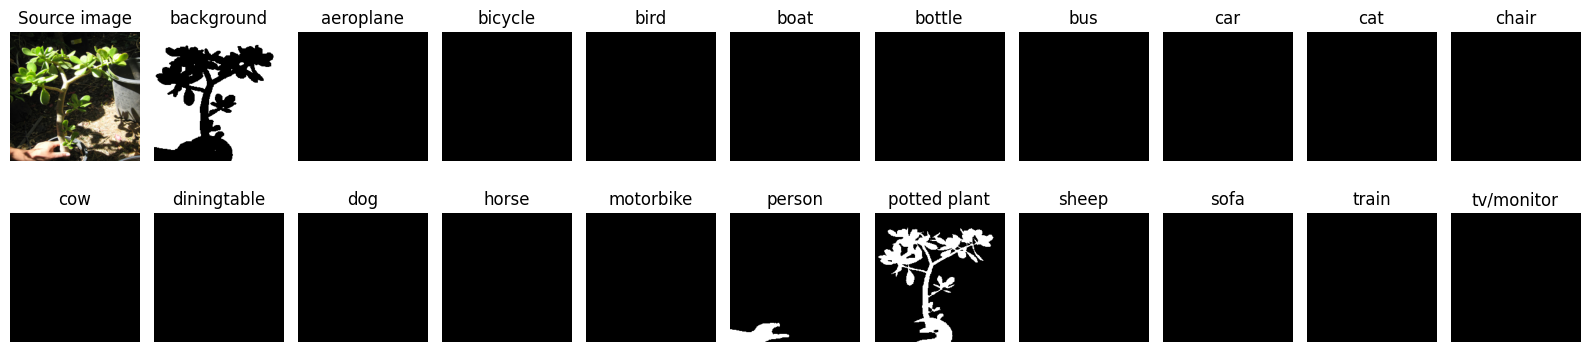

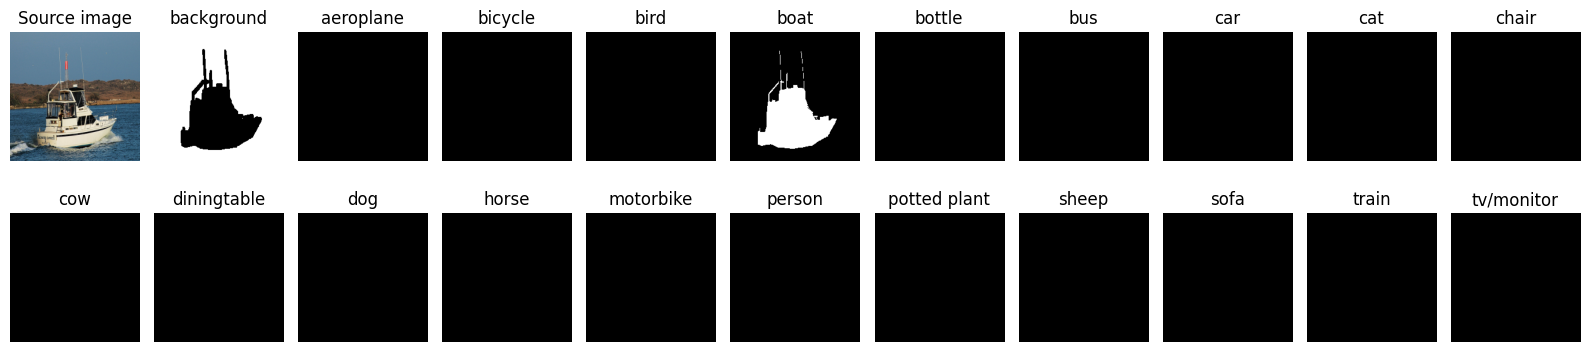

In [61]:
from source.utils.general import read_config
from source.datasets import VOCSegmentation


config = read_config("config.yml")
dataset = VOCSegmentation(config, "train", None)
random_indices = [sys_rand.choice(range(len(dataset))) for _ in range(2)]
for idx in random_indices:
    image, mask = dataset[idx]
    show_image_with_masks(image, mask)

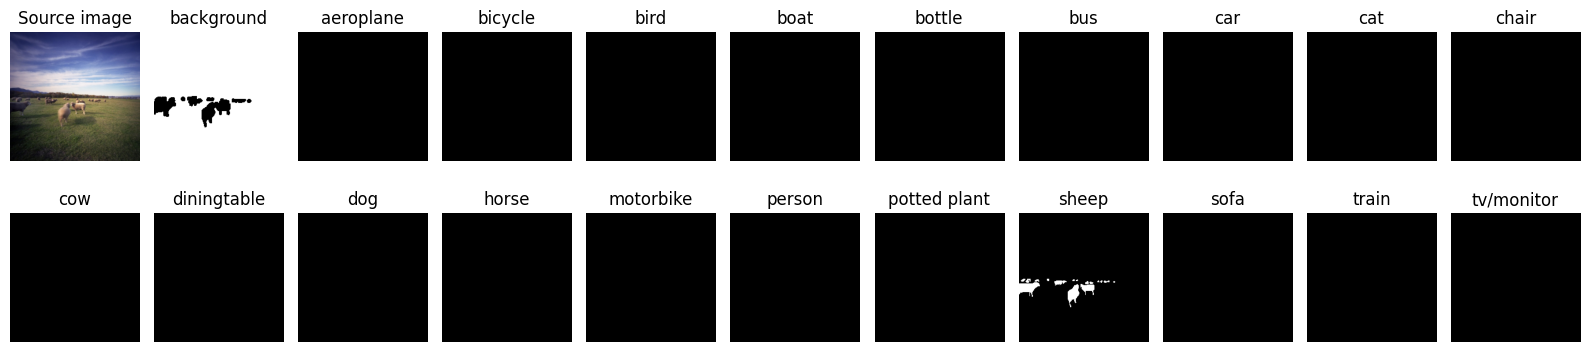

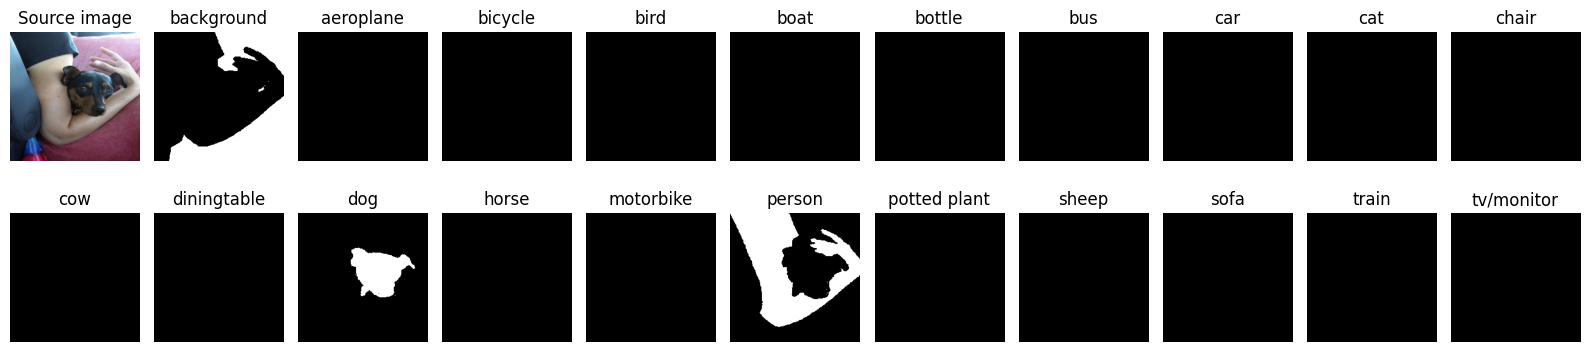

In [58]:
dataset = VOCSegmentation(config, "val", None)
random_indices = [sys_rand.choice(range(len(dataset))) for _ in range(2)]
for idx in random_indices:
    image, mask = dataset[idx]
    show_image_with_masks(image, mask)

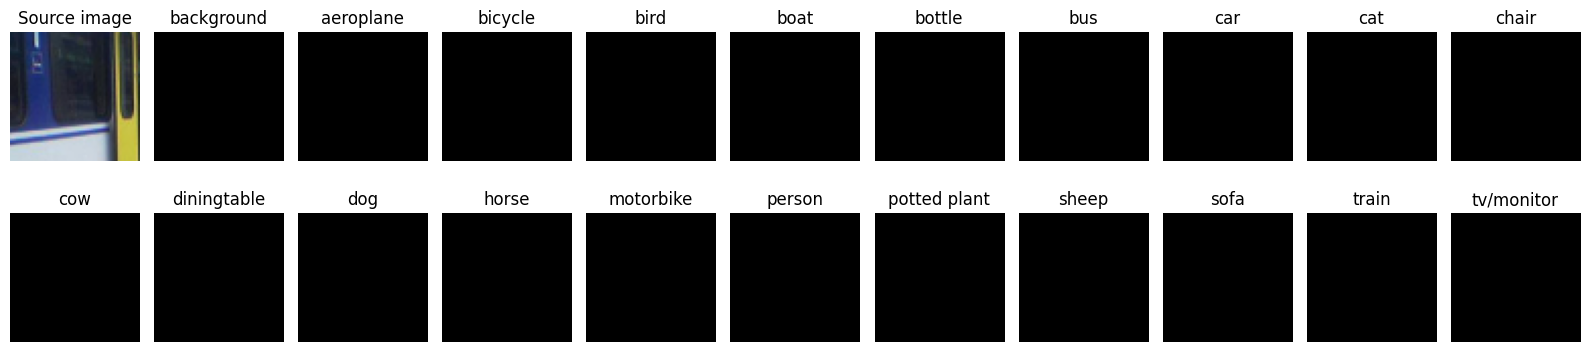

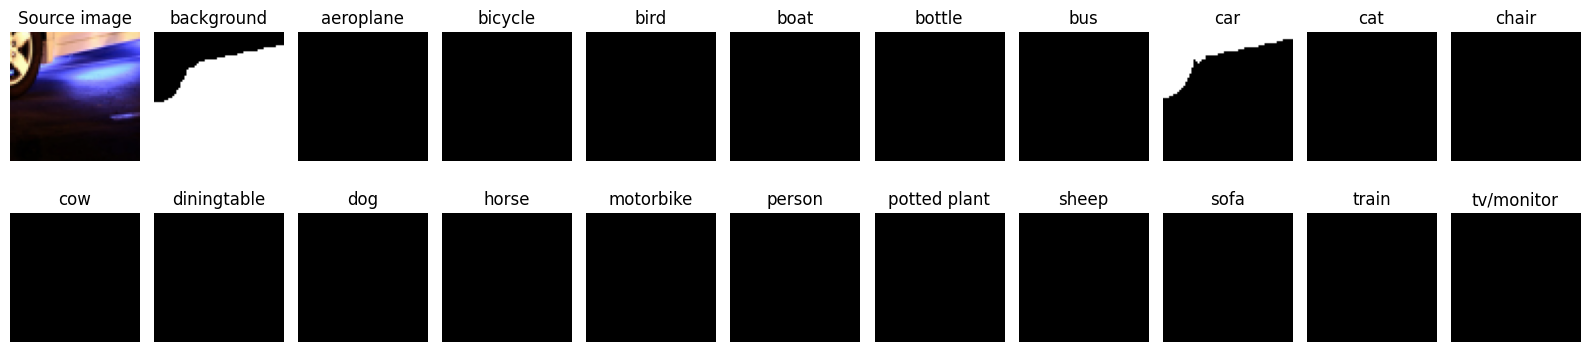

In [62]:
from source.utils.augmentations import get_albumentation_augs


dataset = VOCSegmentation(config, "train", get_albumentation_augs(config)["train"])
random_indices = [sys_rand.choice(range(len(dataset))) for _ in range(2)]
for idx in random_indices:
    image, mask = dataset[idx]
    show_image_with_masks(image, mask)

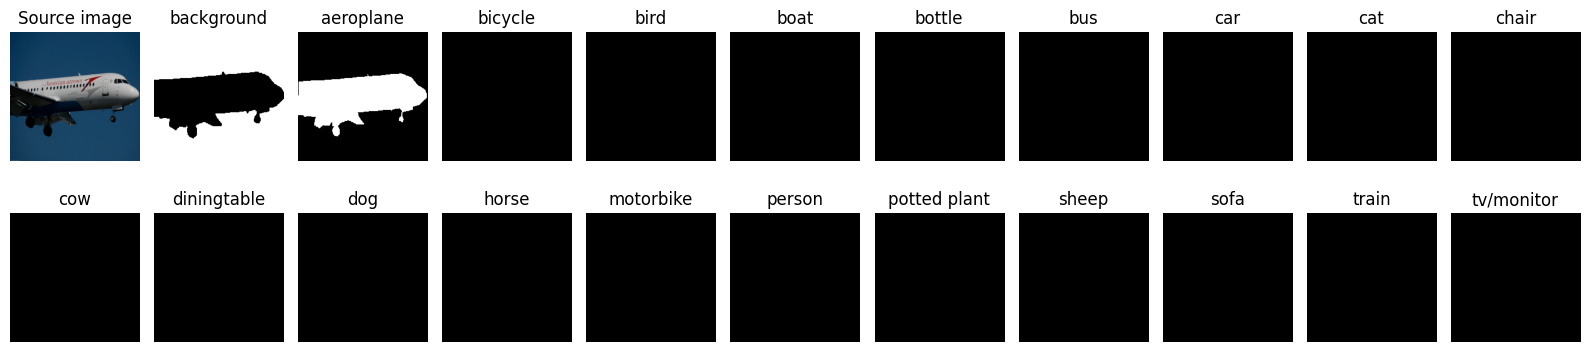

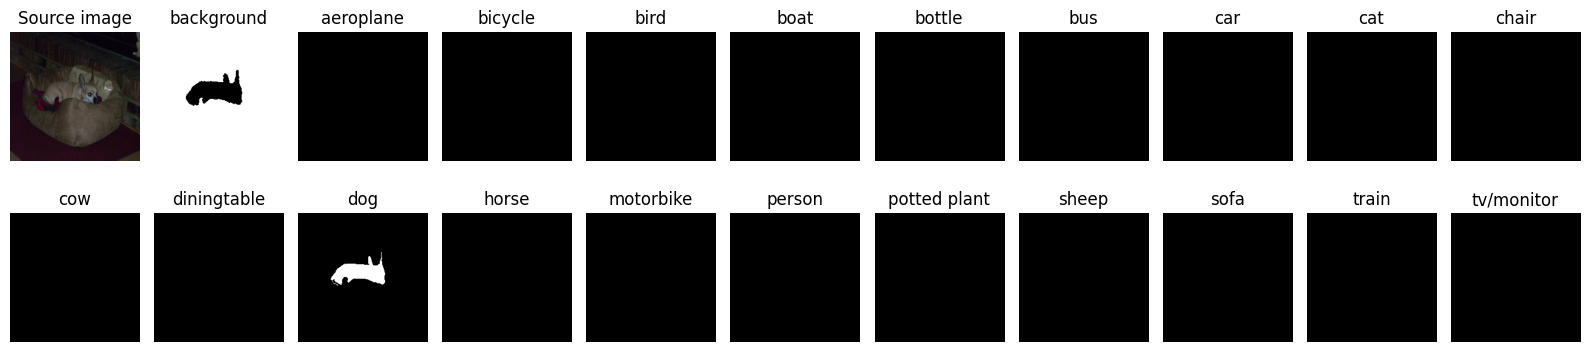

In [60]:
dataset = VOCSegmentation(config, "val", get_albumentation_augs(config)["val"])
random_indices = [sys_rand.choice(range(len(dataset))) for _ in range(2)]
for idx in random_indices:
    image, mask = dataset[idx]
    show_image_with_masks(image, mask)